In [2]:
import pandas as pd
import numpy as np
import datetime as dt

In [6]:
all_value = pd.read_csv('./all_value.csv',index_col='date')
all_value.index = pd.to_datetime(all_value.index)
all_value
P1 = 3

## 比特币

In [35]:
df = pd.DataFrame(all_value['bitcoin_value'])
df.columns = ['value']
df['change'] = df.value.diff()           #相对于昨天涨跌幅
df['ratio'] = df.change / df.value           #涨跌比率
df['up'] = df.ratio[df.ratio > 0] 
df['down'] = df.ratio[df.ratio < 0] 

up_05 = df.up.quantile(.5)       #涨幅中位数0.015516689495233852
up_u = 4
up_09 = 0.177859096    #最大累计涨幅

down_05 = df.down.quantile(.5)          #跌幅中位数-0.015195236993925254
down_u = 3
down_01 = -0.125855917
α = 0.02


### 跌时加仓bitcoin

[[9.70963028]] [[-76.22304578]]
[-18.25894768]


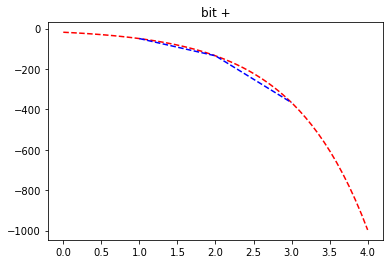

In [25]:
# 解线性方程组，跌时求加仓金额
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import solve

M05 = up_05
M01 = down_01
U1 = down_u

# P1,P2,P3 加仓金额
list1 = [ M05*(1+M01/U1)*(1-α)+(1-α)*M01/U1-α ,M05*(1-α)-α,0]
list2 =[ M05*(1-α)*(1+M01/U1)**2+(1-α)*(2+M01/U1)*M01/U1-α,M05*(1+M01/U1)*(1-α)+(1-α)*M01/U1-α ,M05*(1-α)-α]
list_all = [list1,list2]

a =np.mat([i[1:] for i in list_all])#系数矩阵
b =np.mat([i[0] for i in list_all]).T    #常数项列矩阵
P=solve(a,b)        #方程组的解
print(P[0],P[1])
# # [[436.40492024]
# #  [560.68906005]]

from scipy.optimize import curve_fit  #拟合求参数
def y(a,t):
    return a*np.exp(t)

x = [1,2,3]
popt, pcov = curve_fit(y,x,[P1,P[0],P[1]])
plt.plot(np.linspace(0,4,50),[y(popt[0],t) for t in np.linspace(0,4,50)],'r--')
plt.plot(x,[y(popt[0],t) for t in x],'b--')
plt.title('bit +')
print(popt)       # [5.30005764]

In [40]:
def model(P1,M05,M01,α,U1=4):
    list1 = [ M05*(1+M01/U1)*(1-α)+(1-α)*M01/U1-α ,M05*(1-α)-α,0,0]
    list2 =[ M05*(1-α)*(1+M01/U1)**2+(1-α)*(2+M01/U1)*M01/U1-α,M05*(1+M01/U1)*(1-α)+(1-α)*M01/U1-α ,M05*(1-α)-α,0]
    list3 =[ M05*(1-α)*(1+M01/U1)**3+(1-α)*(M01/U1)*(1+(1+M01/U1)**2)-α,M05*(1-α)*(1+M01/U1)**2+(1-α)*(2+M01/U1)*M01/U1-α,M05*(1+M01/U1)*(1-α)+(1-α)*M01/U1-α ,M05*(1-α)-α]
    list_all = [list1,list2,list3]

    a =np.mat([i[1:] for i in list_all])#系数矩阵
    b =np.mat([i[0] for i in list_all]).T    #常数项列矩阵
    P=solve(a,b)        #方程组的解
    print(P1,P[0],P[1],P[2])
    # [[436.40492024]
    #  [560.68906005]]

    from scipy.optimize import curve_fit  #拟合求参数
    def y(a,t):
        return a*np.exp(t)

    x = [i for i in range(1,5)]       #x=np.linspace(1,4,4)
    popt, pcov = curve_fit(y,x,[P1,P[0],P[1],P[2]])

    plt.plot(np.linspace(0,4,50),[y(popt[0],t) for t in np.linspace(0,4,50)],'r--')
    plt.plot(x,[y(popt[0],t) for t in x],'b--')
    plt.title('bit -')
    print(popt[0])
    return popt[0]

250 [[-0.22991402]] [[-1.56737635]] [[-2.26038465]]
2.061771835676069
250 [[0.38811962]] [[-0.3798375]] [[0.00439735]]
2.118879803164117
250 [[2.73412254]] [[-3.0235628]] [[0.53840118]]
2.1144512648159832


2.1144512648159832

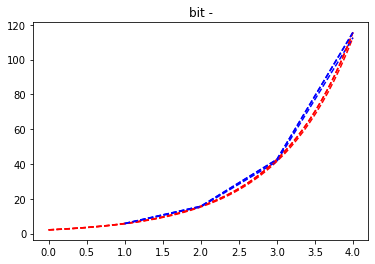

In [41]:
model(250,-0.015195236993925254,0.177859096,0.02,4)    #bitcoin涨时减仓额
# model(0.015516689495233852,)
model(250, -0.0043653219295970245 ,0.035561898,0.01,4)       #黄金涨时的
model(250,0.004628232216520685, -0.037786983,0.01,4)       #黄金

### 涨时减仓bitcoin

[[-0.22991402]] [[-1.56737635]] [[-2.26038465]]
[-23.86535856]


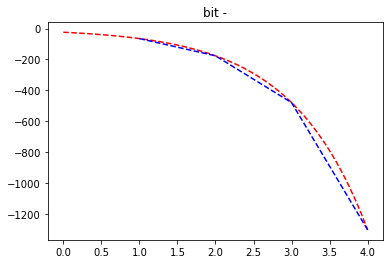

In [26]:
# 解线性方程组，跌时求加仓金额
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import solve

M05 = down_05
M01 = up_09
U1 = up_u   #4

# P1,P2,P3 -仓金额
list1 = [ M05*(1+M01/U1)*(1-α)+(1-α)*M01/U1-α ,M05*(1-α)-α,0,0]
list2 =[ M05*(1-α)*(1+M01/U1)**2+(1-α)*(2+M01/U1)*M01/U1-α,M05*(1+M01/U1)*(1-α)+(1-α)*M01/U1-α ,M05*(1-α)-α,0]
list3 =[ M05*(1-α)*(1+M01/U1)**3+(1-α)*(M01/U1)*(1+(1+M01/U1)**2)-α,M05*(1-α)*(1+M01/U1)**2+(1-α)*(2+M01/U1)*M01/U1-α,M05*(1+M01/U1)*(1-α)+(1-α)*M01/U1-α ,M05*(1-α)-α]
list_all = [list1,list2,list3]

a =np.mat([i[1:] for i in list_all])#系数矩阵
b =np.mat([i[0] for i in list_all]).T    #常数项列矩阵
P=solve(a,b)        #方程组的解
print(P[0],P[1],P[2])
# [[436.40492024]
#  [560.68906005]]

from scipy.optimize import curve_fit  #拟合求参数
def y(a,t):
    return a*np.exp(t)

x = [i for i in range(1,5)]       #x=np.linspace(1,4,4)
popt, pcov = curve_fit(y,x,[P1,P[0],P[1],P[2]])
plt.plot(np.linspace(0,4,50),[y(popt[0],t) for t in np.linspace(0,4,50)],'r--')
plt.plot(x,[y(popt[0],t) for t in x],'b--')
plt.title('bit -')
print(popt)       # [5.30005764]

## 黄金的参数

In [31]:
df = pd.DataFrame(all_value['gold_value'])
# df.rename(columns={'gold_value':'value'}, inplace='True')     #改列名
df.columns = ['value']
df['change'] = df.value.diff()           #相对于昨天涨跌幅
df['ratio'] = df.change / df.value           #涨跌比率
df['up'] = df.ratio[df.ratio > 0] 
df['down'] = df.ratio[df.ratio < 0] 

up_05 = df.up.quantile(.5)       #涨幅中位数0.004628232216520685
up_u = 4
up_09 = 0.035561898    #最大累计涨幅

down_05 = df.down.quantile(.5)          #跌幅中位数-0.0043653219295970245
down_u = 4
down_01 =  -0.037786983

0.004628232216520685 -0.0043653219295970245


### 跌时加仓

[[262.63997997]] [[536.07792316]] [[1599.65353554]]
[5.67927663]


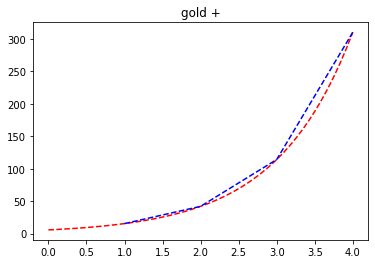

In [37]:
# 解线性方程组，跌时求加仓金额
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import solve

M05 = up_05
M01 = down_01
U1 = down_u

# P1,P2,P3 加仓金额
list1 = [ M05*(1+M01/U1)+M01/U1,M05,0,0]
list2 =[ M05*(1+M01/U1)**2+(1+M01/U1)*M01/U1,M05*(1+M01/U1)+M01/U1,M05,0]
list3 =[ M05*(1+M01/U1)**3+M01/U1*(1+M01/U1)**2+M01/U1*(1+M01/U1),M05*(1+M01/U1)**2+(1+M01/U1)*M01/U1,M05*(1+M01/U1)+M01/U1,M05]
P1 = 250

for i in list1:
    i = i*0.99
for i in list2:
    i = i*0.99
for i in list3:
    i = i*0.99

a =np.mat([list1[1:],list2[1:],list3[1:]])#系数矩阵
b =np.mat([list1[0]*(-1)*P1,list2[0]*(-1)*P1,list3[0]*(-1)*P1]).T    #常数项列矩阵
P=solve(a,b)        #方程组的解
print(P[0],P[1],P[2])


from scipy.optimize import curve_fit  #拟合求参数
def y(a,t):
    return a*np.exp(t)

x = np.linspace(1,4,4)
popt, pcov = curve_fit(y,x,[250,P[0],P[1],P[2]])
plt.plot(np.linspace(0,4,50),[y(popt[0],t) for t in np.linspace(0,4,50)],'r--')
plt.plot(x,[y(popt[0],t) for t in x],'b--')
plt.title('gold +')
print(popt)       # [5.30005764]

### 涨时减仓

[[  2285.36117501]
 [ 23278.48204423]
 [239772.21670523]]
[10.44750134]


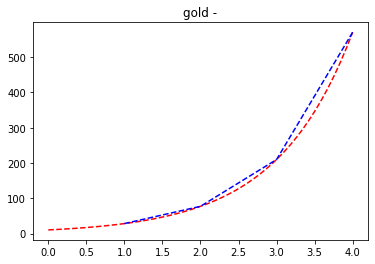

In [38]:
# 解线性方程组，涨时求减仓金额
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import solve

M05 = down_05
M01 = up_09
U1 = up_u

# P1,P2,P3,P4减仓金额
list1 = [ M05*(1+M09/U1)+M09/U1,M05,0,0]
list2 =[ M05*(1+M09/U1)**2+(M09/U1+1)*(M09/U1),M05*(1+M09/U1)+M09/U1,M05,0]
list3 =[ M05*(1+M09/U1)**3+(M09/U1)*(1+M09/U1)**2+(M09/U1+1)*(M09/U1),M05*(1+M09/U1)**2+(M09/U1+1)*(M09/U1),M05*(1+M09/U1)+M09/U1,M05]
P1 = 250

#考虑佣金成本
for i in list1:
    i = i*0.99
for i in list2:
    i = i*0.99 
for i in list3:
    i = i*0.99 

a =np.mat([i[1:] for i in [list1,list2,list3]])#系数矩阵
b =np.mat([i[0]*(-1)*P1 for i in [list1,list2,list3]]).T    #常数项列矩阵
P=solve(a,b)        #方程组的解
print(P)       


from scipy.optimize import curve_fit  #拟合求参数
def y(a,t):
    return a*np.exp(t)
x = [1,2,3,4]

# [[-2.22261863e+00]
#  [ 6.20917649e-18]
#  [-3.09479296e-20]]
popt, pcov = curve_fit(y,x,[250,P[0],P[1],P[2]])
plt.plot(np.linspace(0,4,50),[y(popt[0],t) for t in np.linspace(0,4,50)],'r--')
plt.plot(x,[y(popt[0],t) for t in x],'b--')
plt.title('gold -')
print(popt)  #[2.10232263]

###